<a href="https://colab.research.google.com/github/kasurashan/rgbd2/blob/main/loss_landscape_3%EA%B0%9C%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Colab 시작 페이지</h1>
</div>

Colab에 이미 익숙하다면 이 동영상을 통해 양방향 테이블, 코드 실행 기록 보기, 명령어 팔레트에 관해 알아보세요.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  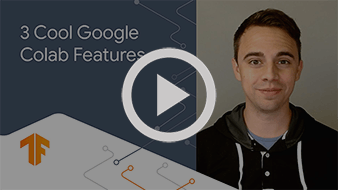
  </a>
</center>

<div class="markdown-google-sans">
  <h2>Colab이란?</h2>
</div>

Colaboratory&#40;줄여서 'Colab'이라고 함&#41;을 통해 브라우저 내에서 Python 스크립트를 작성하고 실행할 수 있습니다.
- 구성이 필요하지 않음
- 무료로 GPU 사용
- 간편한 공유

<strong>학생</strong>이든, <strong>데이터 과학자</strong>든, <strong>AI 연구원</strong>이든 Colab으로 업무를 더욱 간편하게 처리할 수 있습니다. <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Colab 소개 영상</a>에서 자세한 내용을 확인하거나 아래에서 시작해 보세요.

In [ ]:
import numpy as np

In [ ]:
x = np.load("/content/plane_rgbrgb_train_10.npz")

In [ ]:
for i in x:
  print(i)

ts
bend_coordinates
alphas
betas
grid
te_loss


In [ ]:
x['te_loss']

array([[32.84321594, 31.92836761, 31.22181892, 30.69212914, 30.32322121,
        30.05589867, 29.85663605, 29.83513641, 29.91923141, 30.09138489,
        30.41675186, 30.86467934, 31.43021584, 32.08869934, 32.86794662,
        33.68419266, 34.57292175, 35.50680923, 36.50591278, 37.56135559,
        38.70533371],
       [32.40477371, 31.53036118, 30.82476425, 30.35160255, 30.00500298,
        29.75124741, 29.60733223, 29.55180359, 29.62996101, 29.81196976,
        30.12301064, 30.58950615, 31.13331604, 31.76804161, 32.50053787,
        33.30721283, 34.19789124, 35.07309341, 36.06158829, 37.09693527,
        38.2175827 ],
       [32.0687561 , 31.23786545, 30.56804848, 30.0868206 , 29.76730156,
        29.52809525, 29.39096642, 29.34173393, 29.42949867, 29.63489151,
        29.92416954, 30.37195206, 30.87739563, 31.50827408, 32.21269608,
        32.97818375, 33.84066391, 34.7322998 , 35.67808533, 36.69524002,
        37.76876068],
       [31.82409286, 31.01755333, 30.33265495, 29.90231705

In [ ]:
x['bend_coordinates']

array([[ 6.97610870e+01, -6.04453121e-04],
       [ 3.56333246e+01,  5.47797923e+01]])

In [ ]:
import argparse
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import os
import seaborn as sns


In [ ]:
class LogNormalize(colors.Normalize):

    def __init__(self, vmin=None, vmax=None, clip=None, log_alpha=None):
        self.log_alpha = log_alpha
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        log_v = np.ma.log(value - self.vmin)
        log_v = np.ma.maximum(log_v, self.log_alpha)
        return 0.9 * (log_v - self.log_alpha) / (np.log(self.vmax - self.vmin) - self.log_alpha)

In [ ]:
def plane(grid, values, vmax=None, log_alpha=-5, N=7, cmap='jet_r'):
    cmap = plt.get_cmap(cmap)
    if vmax is None:
        clipped = values.copy()
    else:
        clipped = np.minimum(values, vmax)
    log_gamma = (np.log(clipped.max() - clipped.min()) - log_alpha) / N
    levels = clipped.min() + np.exp(log_alpha + log_gamma * np.arange(N + 1))
    levels[0] = clipped.min()
    levels[-1] = clipped.max()
    levels = np.concatenate((levels, [1e10]))
    norm = LogNormalize(clipped.min() - 1e-8, clipped.max() + 1e-8, log_alpha=log_alpha)
    contour = plt.contour(grid[:, :, 0], grid[:, :, 1], values, cmap=cmap, norm=norm,
                          linewidths=2.5,
                          zorder=1,
                          levels=levels)
    contourf = plt.contourf(grid[:, :, 0], grid[:, :, 1], values, cmap=cmap, norm=norm,
                            levels=levels,
                            zorder=0,
                            alpha=0.55)
    colorbar = plt.colorbar(format='%.2g')
    labels = list(colorbar.ax.get_yticklabels())
    labels[-1].set_text(r'$>\,$' + labels[-2].get_text())
    colorbar.ax.set_yticklabels(labels)
    return contour, contourf, colorbar

In [ ]:
def level(grid, values, vmax=None, log_alpha=-5, N=7, cmap='jet_r'):
    cmap = plt.get_cmap(cmap)
    if vmax is None:
        clipped = values.copy()
    else:
        clipped = np.minimum(values, vmax)
    print(clipped)
    log_gamma = (np.log(clipped.max() - clipped.min()) - log_alpha) / N
    levels = clipped.min() + np.exp(log_alpha + log_gamma * np.arange(N + 1))
    levels[0] = clipped.min()
    levels[-1] = clipped.max()
    levels = np.concatenate((levels, [1e10]))
    return levels

In [ ]:
x['grid'], x['te_loss']

(array([[[-13.95220186, -10.95588403],
         [-13.95220186,  -7.12132462],
         [-13.95220186,  -3.28676521],
         [-13.95220186,   0.5477942 ],
         [-13.95220186,   4.38235361],
         [-13.95220186,   8.21691302],
         [-13.95220186,  12.05147244],
         [-13.95220186,  15.88603185],
         [-13.95220186,  19.72059126],
         [-13.95220186,  23.55515067],
         [-13.95220186,  27.38971008],
         [-13.95220186,  31.22426949],
         [-13.95220186,  35.05882891],
         [-13.95220186,  38.89338832],
         [-13.95220186,  42.72794773],
         [-13.95220186,  46.56250714],
         [-13.95220186,  50.39706655],
         [-13.95220186,  54.23162596],
         [-13.95220186,  58.06618538],
         [-13.95220186,  61.90074479],
         [-13.95220186,  65.7353042 ]],
 
        [[ -9.06893121, -10.95588403],
         [ -9.06893121,  -7.12132462],
         [ -9.06893121,  -3.28676521],
         [ -9.06893121,   0.5477942 ],
         [ -9.06893121

In [ ]:
x['grid'].shape

(3, 3, 2)

In [ ]:
x['grid'][:,:,0]

array([[-13.95220186, -13.95220186, -13.95220186],
       [ 34.88050465,  34.88050465,  34.88050465],
       [ 83.71321117,  83.71321117,  83.71321117]])

In [ ]:
levels = level(
    x['grid'],
    x['te_loss'],
    # vmax=5.0,
    log_alpha=-5.0, N=7
)

[[32.84321594 31.92836761 31.22181892 30.69212914 30.32322121 30.05589867
  29.85663605 29.83513641 29.91923141 30.09138489 30.41675186 30.86467934
  31.43021584 32.08869934 32.86794662 33.68419266 34.57292175 35.50680923
  36.50591278 37.56135559 38.70533371]
 [32.40477371 31.53036118 30.82476425 30.35160255 30.00500298 29.75124741
  29.60733223 29.55180359 29.62996101 29.81196976 30.12301064 30.58950615
  31.13331604 31.76804161 32.50053787 33.30721283 34.19789124 35.07309341
  36.06158829 37.09693527 38.2175827 ]
 [32.0687561  31.23786545 30.56804848 30.0868206  29.76730156 29.52809525
  29.39096642 29.34173393 29.42949867 29.63489151 29.92416954 30.37195206
  30.87739563 31.50827408 32.21269608 32.97818375 33.84066391 34.7322998
  35.67808533 36.69524002 37.76876068]
 [31.82409286 31.01755333 30.33265495 29.90231705 29.61603928 29.36164093
  29.21232986 29.1866436  29.31261253 29.51028442 29.78713608 30.20563507
  30.72349358 31.30406761 31.99378777 32.739151   33.55660248 34.40463

In [ ]:
levels

array([2.90186939e+01, 2.90378872e+01, 2.90733667e+01, 2.91744314e+01,
       2.94623180e+01, 3.02823735e+01, 3.26183319e+01, 3.92723961e+01,
       1.00000000e+10])

In [ ]:
bend_coordinates = x['bend_coordinates']

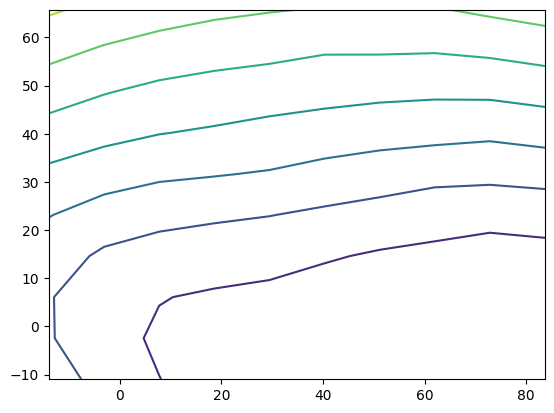

In [ ]:
contour = plt.contour(x['grid'][:, :, 0], x['grid'][:, :, 1], x['te_loss'])

<ipython-input-18-cd9cf41a4b50>:1: UserWarning: The following kwargs were not used by contour: 'dpi'
  contour = plt.contourf(x['grid'][:, :, 0], x['grid'][:, :, 1], x['te_loss'], cmap='jet_r', levels=50, dpi=300)


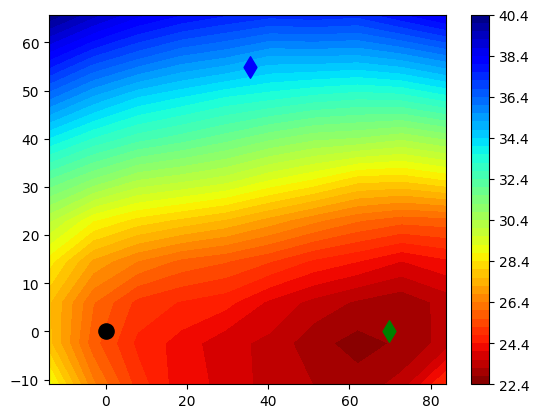

In [ ]:
contour = plt.contourf(x['grid'][:, :, 0], x['grid'][:, :, 1], x['te_loss'], cmap='jet_r', levels=50, dpi=300)
plt.scatter(bend_coordinates[0, 0], bend_coordinates[0, 1], marker='d', c='g', s=120, zorder=2)
# plt.scatter(3.48805435e+01, -3.02226560e-04, marker='^', c='g', s=120, zorder=2)

plt.scatter(bend_coordinates[1, 0], bend_coordinates[1, 1], marker='d', c='b', s=120, zorder=2)
# plt.scatter(1.78166623e+01,  2.73898961e+01, marker='^', c='b', s=120, zorder=2)


# plt.scatter(3.51317487e+01,  1.82597210e+01, marker='x', c='b', s=120, zorder=2)

plt.scatter(0,0, marker='o', c='k', s=120, zorder=2)
colorbar = plt.colorbar(contour)
plt.show()



# array([[ 3.48805435e+01,  1.78166623e+01],       [-3.02226560e-04,  2.73898961e+01]])
# array([[ 6.97610870e+01, -6.04453121e-04],       [ 3.56333246e+01,  5.47797923e+01],       [ 3.48805435e+01, -3.02226560e-04],       [ 1.78166623e+01,  2.73898961e+01],       [ 3.51317487e+01,  1.82597210e+01]])

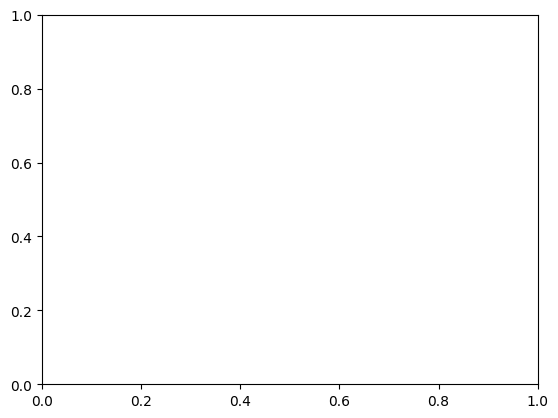

In [ ]:
levels

array([5.e+00, 5.e+00, 5.e+00, 5.e+00, 5.e+00, 5.e+00, 5.e+00, 5.e+00,
       1.e+10])

In [ ]:
vmax=5.0
log_alpha=-5.0
N=7

In [ ]:
values = x['te_loss']

In [ ]:
cmap = plt.get_cmap('jet_r')
if vmax is None:
    clipped = values.copy()
else:
    clipped = np.minimum(values, vmax)
log_gamma = (np.log(clipped.max() - clipped.min()) - log_alpha) / N
levels = clipped.min() + np.exp(log_alpha + log_gamma * np.arange(N + 1))
levels[0] = clipped.min()
levels[-1] = clipped.max()
levels = np.concatenate((levels, [1e10]))
norm = LogNormalize(clipped.min() - 1e-8, clipped.max() + 1e-8, log_alpha=log_alpha)

<ipython-input-99-c8b16dd13d75>:6: RuntimeWarning: divide by zero encountered in log
  log_gamma = (np.log(clipped.max() - clipped.min()) - log_alpha) / N
<ipython-input-99-c8b16dd13d75>:7: RuntimeWarning: invalid value encountered in multiply
  levels = clipped.min() + np.exp(log_alpha + log_gamma * np.arange(N + 1))


In [ ]:
grid = x['grid']

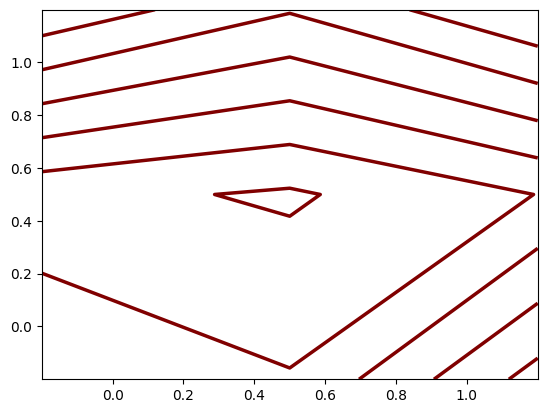

In [ ]:
contour = plt.contour(grid[:, :, 0], grid[:, :, 1], values, cmap=cmap, norm=norm,
                          linewidths=2.5,
                          zorder=1)
                          # levels=levels)


In [ ]:
contour

In [ ]:
bend_coordinates

array([[ 6.97606289e+01, -1.04824377e-05],
       [ 3.56330917e+01,  5.47797732e+01]])

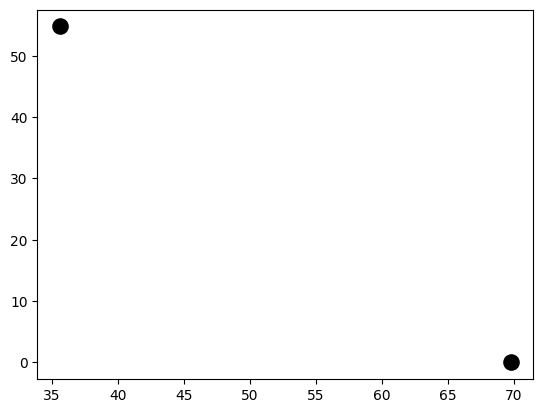

In [ ]:
plt.scatter(bend_coordinates[[0, 1], 0], bend_coordinates[[0, 1], 1], marker='o', c='k', s=120, zorder=2)